# Instalamos prerequisitos

In [ ]:
from bs4 import BeautifulSoup as bs
import requests
import re

### Utilizamos pip, para instalar por consola los paquetes de openai

In [ ]:
pip install openai 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 KB 16.3 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


La librería de openai, es la libreria utilizada para usar la API de ChatGPT, ella ha sido desarroillada por openai y permite por medio de una llave utilizar los recursos de openai, la documentación se encuentra en: https://github.com/openai/openai-python, https://platform.openai.com/docs/api-reference?lang=python 

# BBC NOTICE

In [ ]:
source = requests.get("https://www.bbc.com/mundo/noticias-60751978").text
soup = bs(source, "lxml")
print(soup.prettify) # observamos el html del sitio web 

<bound method Tag.prettify of <!DOCTYPE html>
<html class="no-js" dir="ltr" lang="es"><head><meta content="IE=edge" data-react-helmet="true" http-equiv="X-UA-Compatible"/><meta charset="utf-8" data-react-helmet="true"/><meta content="noodp, noydir, max-image-preview:large" data-react-helmet="true" name="robots"/><meta content="#B80000" data-react-helmet="true" name="theme-color"/><meta content="width=device-width, initial-scale=1, minimum-scale=1" data-react-helmet="true" name="viewport"/><meta content="app-id=515255747, app-argument=https://www.bbc.com/mundo/noticias-60751978?utm_medium=banner&amp;utm_content=apple-itunes-app" data-react-helmet="true" name="apple-itunes-app"/><meta content="BBC News Mundo" data-react-helmet="true" name="apple-mobile-web-app-title"/><meta content="BBC News Mundo" data-react-helmet="true" name="application-name"/><meta content='"Hay cada vez más uso de antidepresivos, más asistencia a terapia psicológica y más expresión autoinformada de ansiedad y trist

In [ ]:
example = soup.find("div", class_ ="bbc-19j92fr ebmt73l0").text 
# usando scraping vemos donde esta ubicado el texto que queremos 
print(example)

Hace unos meses una paciente me dijo: "Pertenezco a la generación deprimida, ¿cómo no voy a estarlo?" Era su primera sesión y vino a terapia porque se encontraba sin ganas de nada, sin motivación y con la sensación de que la vida no tenía sentido.


In [ ]:
text = " "
for i in soup.find_all("div", class_ ="bbc-19j92fr ebmt73l0"):
    seccion = i.text.lower()
    str(seccion)
    text= (text+ " " + seccion)

In [ ]:
text = re.sub(r"[^\w]", " ",text)
text

'  hace unos meses una paciente me dijo   pertenezco a la generación deprimida   cómo no voy a estarlo   era su primera sesión y vino a terapia porque se encontraba sin ganas de nada  sin motivación y con la sensación de que la vida no tenía sentido  estaba en lo cierto  pertenece a la llamada  generación deprimida   una generación que engloba  en realidad  el conjunto de dos de ellas  la millennial  también llamada generación y  y la generación z  la primera de ellas hace referencia a las personas que nacieron entre 1981 y 1995 y la segunda a quienes llegaron al mundo entre 1995 y 2010  ambas fechas son aproximadas pues no hay un consenso claro social para esta clasificación   lo cierto es que hay cada vez más uso de antidepresivos  más asistencia a terapia psicológica y más expresión autoinformada de ansiedad y tristeza en estas generaciones  vayamos por partes para descubrir qué factores influyen en esto   qué factores han deprimido a esta generación  antes de nada  empecemos por de

In [9]:
import nltk 
nltk.download("punkt")
from nltk.corpus import stopwords # TEXT: tiene que ser un dominio en especifico
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
stop_words = set(stopwords.words('spanish')) # descargamos los stop words en español, ello porque realizamos el estudio en español.

In [ ]:
tokens = word_tokenize(text)
tokens

['hace',
 'unos',
 'meses',
 'una',
 'paciente',
 'me',
 'dijo',
 'pertenezco',
 'a',
 'la',
 'generación',
 'deprimida',
 'cómo',
 'no',
 'voy',
 'a',
 'estarlo',
 'era',
 'su',
 'primera',
 'sesión',
 'y',
 'vino',
 'a',
 'terapia',
 'porque',
 'se',
 'encontraba',
 'sin',
 'ganas',
 'de',
 'nada',
 'sin',
 'motivación',
 'y',
 'con',
 'la',
 'sensación',
 'de',
 'que',
 'la',
 'vida',
 'no',
 'tenía',
 'sentido',
 'estaba',
 'en',
 'lo',
 'cierto',
 'pertenece',
 'a',
 'la',
 'llamada',
 'generación',
 'deprimida',
 'una',
 'generación',
 'que',
 'engloba',
 'en',
 'realidad',
 'el',
 'conjunto',
 'de',
 'dos',
 'de',
 'ellas',
 'la',
 'millennial',
 'también',
 'llamada',
 'generación',
 'y',
 'y',
 'la',
 'generación',
 'z',
 'la',
 'primera',
 'de',
 'ellas',
 'hace',
 'referencia',
 'a',
 'las',
 'personas',
 'que',
 'nacieron',
 'entre',
 '1981',
 'y',
 '1995',
 'y',
 'la',
 'segunda',
 'a',
 'quienes',
 'llegaron',
 'al',
 'mundo',
 'entre',
 '1995',
 'y',
 '2010',
 'ambas',
 

In [ ]:
palabras_comunes = FreqDist(tokens)
palabras_comunes

FreqDist({'de': 55, 'la': 43, 'que': 43, 'y': 29, 'a': 25, 'en': 23, 'las': 19, 'por': 19, 'se': 18, 'es': 17, ...})

In [ ]:
palabras_vacias = set(stopwords.words('spanish'))
new_words = ["uso", "generaciones", "mayor", "sociales", "parte"]
palabras_vacias.update(new_words)
no_stopwords = [x for x in tokens if x not in palabras_vacias]

In [ ]:
palabras = FreqDist(no_stopwords)
palabras

FreqDist({'generación': 13, 'ansiedad': 10, 'personas': 7, 'social': 5, 'redes': 5, 'deprimida': 4, 'millennial': 4, 'factores': 4, 'situaciones': 4, 'muchas': 4, ...})

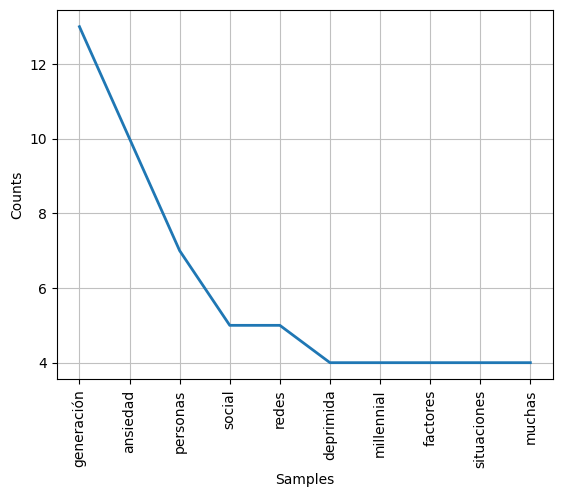

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [ ]:
palabras.plot(10)

## Riqueza de un texto

![Picture title](image-20230422-204358.png)

In [ ]:
#Codificamos la formula y la colocamos en una funcion
def riqueza_lexica(texto):
    vocabulario = sorted(set(texto))
    return len(vocabulario)/len(texto)

riqueza_lexica(tokens)

0.4206426484907498

Se observa una buena riqueza en el texto, esto debido a la extensión del mismo y el uso de sinónimos en conjunto a una variedad de profunda de las palabras.

## Bi gramas

In [ ]:
from nltk.util import ngrams
md_bigrams = list(ngrams(palabras,2))
fdist = FreqDist(md_bigrams)
fdist.most_common(10)

[(('generación', 'ansiedad'), 1),
 (('ansiedad', 'personas'), 1),
 (('personas', 'social'), 1),
 (('social', 'redes'), 1),
 (('redes', 'deprimida'), 1),
 (('deprimida', 'millennial'), 1),
 (('millennial', 'factores'), 1),
 (('factores', 'situaciones'), 1),
 (('situaciones', 'muchas'), 1),
 (('muchas', 'jóvenes'), 1)]

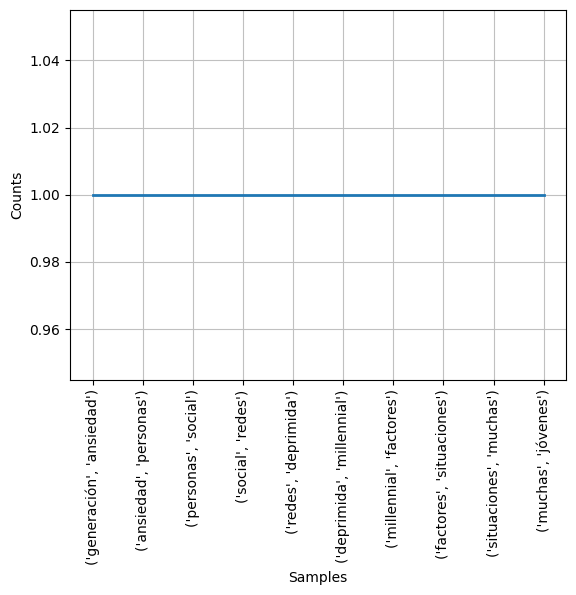

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

Podemos observar que existe una correlación de 1 a 1, en la mayoria de frases, y es por la riqueza del texto y la capacidad de escritura que tiene el redactor de la BBC, también observamos que las palabras que más se repiten son, generación, ansiedad y personas, dando un contexto particular del fenómeno 

# Chat GPT Text

In [ ]:
pip install openai

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


## Contraseña para utilizar el API

Cada usario puede crear una contraseña, para utilizar los servicios de la API, sin embargo tiene un costo agregado, por lo tanto, se mantiene en secreto la linea de codigo asociada. Se utiliza el método openai.api_key, para ingresar la contraseña.

In [19]:
import openai

In [ ]:

import openai


input_a = input('Please, make a request: ')
output = openai.ChatCompletion.create(
  model="gpt-3.5-turbo", 
  messages=[{"role": "user", "content": 
             input_a}]
)

# Print out the whole output dictionary
#print(output)

# Get the output text only
gpt=(output['choices'][0]['message']['content'])
print(gpt)

La generación de los Millennials y la Z, aquella que nació entre los años 1981 y 2010, respectivamente, se ha ganado un apodo poco favorable en el mundo de la psicología: la "generación deprimida". ¿Pero por qué se gana esta etiqueta negativa? ¿Acaso existe alguna evidencia que sustente esta afirmación?

Según la Organización Mundial de la Salud (OMS), la depresión es uno de los trastornos mentales más comunes en el mundo, y la mayoría de las personas que lo padecen son jóvenes en edad universitaria o en sus primeros años de vida laboral. Los expertos han acuñado el término "Millennial burnout" o "Burnout de los Millennials", para describir la sensación de cansancio físico y mental que siente esta generación, que a menudo se debe al exceso de trabajo y al estrés de la vida moderna.

Y es que esta generación ha experimentado desafíos que las generaciones anteriores no tuvieron que enfrentar. El acceso infinito a la información y la presión de las redes sociales llevan a los jóvenes a se

In [ ]:
#Tokenizamos El texto 
text= gpt.lower()
token = word_tokenize(text)
token

['la',
 'generación',
 'de',
 'los',
 'millennials',
 'y',
 'la',
 'z',
 ',',
 'aquella',
 'que',
 'nació',
 'entre',
 'los',
 'años',
 '1981',
 'y',
 '2010',
 ',',
 'respectivamente',
 ',',
 'se',
 'ha',
 'ganado',
 'un',
 'apodo',
 'poco',
 'favorable',
 'en',
 'el',
 'mundo',
 'de',
 'la',
 'psicología',
 ':',
 'la',
 '``',
 'generación',
 'deprimida',
 "''",
 '.',
 '¿pero',
 'por',
 'qué',
 'se',
 'gana',
 'esta',
 'etiqueta',
 'negativa',
 '?',
 '¿acaso',
 'existe',
 'alguna',
 'evidencia',
 'que',
 'sustente',
 'esta',
 'afirmación',
 '?',
 'según',
 'la',
 'organización',
 'mundial',
 'de',
 'la',
 'salud',
 '(',
 'oms',
 ')',
 ',',
 'la',
 'depresión',
 'es',
 'uno',
 'de',
 'los',
 'trastornos',
 'mentales',
 'más',
 'comunes',
 'en',
 'el',
 'mundo',
 ',',
 'y',
 'la',
 'mayoría',
 'de',
 'las',
 'personas',
 'que',
 'lo',
 'padecen',
 'son',
 'jóvenes',
 'en',
 'edad',
 'universitaria',
 'o',
 'en',
 'sus',
 'primeros',
 'años',
 'de',
 'vida',
 'laboral',
 '.',
 'los',
 'ex

In [ ]:
#Quitamos las stopwords del texto con la funcion de nltk.corpus stopwords 
stop_words = set(stopwords.words('spanish'))
#Filtramos en nuestro texto
filtered_text= [word for word in token if not word in stop_words and re.sub(r"[^a-zA-Z0-9]","",word)]
filtered_text

['generación',
 'millennials',
 'z',
 'aquella',
 'nació',
 'años',
 '1981',
 '2010',
 'respectivamente',
 'ganado',
 'apodo',
 'favorable',
 'mundo',
 'psicología',
 'generación',
 'deprimida',
 '¿pero',
 'gana',
 'etiqueta',
 'negativa',
 '¿acaso',
 'existe',
 'alguna',
 'evidencia',
 'sustente',
 'afirmación',
 'según',
 'organización',
 'mundial',
 'salud',
 'oms',
 'depresión',
 'trastornos',
 'mentales',
 'comunes',
 'mundo',
 'mayoría',
 'personas',
 'padecen',
 'jóvenes',
 'edad',
 'universitaria',
 'primeros',
 'años',
 'vida',
 'laboral',
 'expertos',
 'acuñado',
 'término',
 'millennial',
 'burnout',
 'burnout',
 'millennials',
 'describir',
 'sensación',
 'cansancio',
 'físico',
 'mental',
 'generación',
 'menudo',
 'debe',
 'exceso',
 'trabajo',
 'estrés',
 'vida',
 'moderna',
 'generación',
 'experimentado',
 'desafíos',
 'generaciones',
 'anteriores',
 'enfrentar',
 'acceso',
 'infinito',
 'información',
 'presión',
 'redes',
 'sociales',
 'llevan',
 'jóvenes',
 'sentirs

In [ ]:
#Vemos cuales son las palabras mas comunes 
fdist= FreqDist(filtered_text)
fdist.most_common(10)

[('jóvenes', 6),
 ('mental', 6),
 ('generación', 5),
 ('millennials', 4),
 ('mundo', 4),
 ('salud', 4),
 ('depresión', 4),
 ('social', 4),
 ('años', 3),
 ('mentales', 3)]

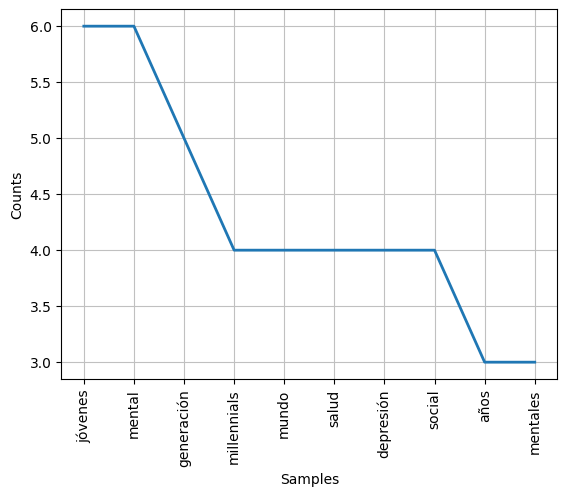

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [ ]:
fdist.plot(10)

En este bigrama se puede observar que las palabras que más se repiten son jóvenes y mental, aludiendo al discurso realizado en el texto. Estas palabras resumen la tesis del texto y logran demostrar la utilidad de este tipo de algoritmos para el tratamiento de textos.

## Riqueza de un texto 

In [ ]:
#Como definimos nuestra funcion anterior, simplemente la llamamos 
riqueza_lexica(gpt)

0.02153558052434457

A pesar de lo anterior la riqueza del texto es poca, y esto es debido a la extensión del texto y escaza acertividad a la hora de hacer una petición a ChatGPT, para realizar un texto con mejor calidad.

## Bi-gramas

In [ ]:
md_bigrams = list(ngrams(filtered_text,2))
fdist = FreqDist(md_bigrams)
fdist.most_common(10)

[(('salud', 'mental'), 3),
 (('generación', 'deprimida'), 2),
 (('etiqueta', 'negativa'), 2),
 (('redes', 'sociales'), 2),
 (('enfermedades', 'mentales'), 2),
 (('millennials', 'gen-z'), 2),
 (('generación', 'millennials'), 1),
 (('millennials', 'z'), 1),
 (('z', 'aquella'), 1),
 (('aquella', 'nació'), 1)]

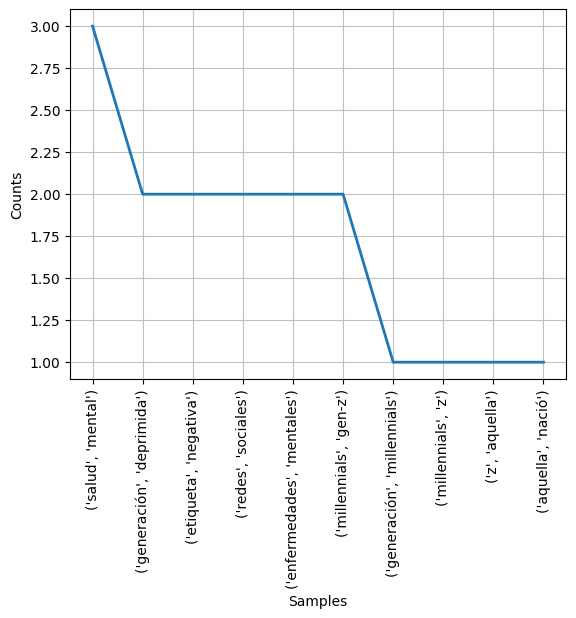

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [ ]:
#Graficamos los 10 bigramas mas comunes
filtered_dist= FreqDist(md_bigrams)
filtered_dist.plot(10)

Observamos que no existe una relación de 1:1 en gran parte del texto, y esto se debe a la poca diversificación del texto, ya que, la capacidad de ChatGPT, de realizar un texto de calidad es reducida.

# Nube de palabras

In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud



You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


## GPT Nube

In [ ]:
#Transformamos la lista de nuestro texto tokenizado en un texto
Strgpt = " ".join(filtered_text)
print(Strgpt)

generación millennials z aquella nació años 1981 2010 respectivamente ganado apodo favorable mundo psicología generación deprimida ¿pero gana etiqueta negativa ¿acaso existe alguna evidencia sustente afirmación según organización mundial salud oms depresión trastornos mentales comunes mundo mayoría personas padecen jóvenes edad universitaria primeros años vida laboral expertos acuñado término millennial burnout burnout millennials describir sensación cansancio físico mental generación menudo debe exceso trabajo estrés vida moderna generación experimentado desafíos generaciones anteriores enfrentar acceso infinito información presión redes sociales llevan jóvenes sentirse siempre comparados demás falta empleos bien remunerados estables causa ansiedad estrés preocupación finanzas incertidumbre futuro especialmente mundo panorama político social cada vez inestable puede causar depresión ansiedad estudio reciente realizado alianza nacional enfermedades mentales nami reveló 75 jóvenes 18 24

In [ ]:
# Crea una instancia de la clase WordCloud
wc = WordCloud(width=800, height=400, max_words=200, background_color='white', colormap='inferno')

# Genera la nube de palabras
cloud = wc.generate(Strgpt)


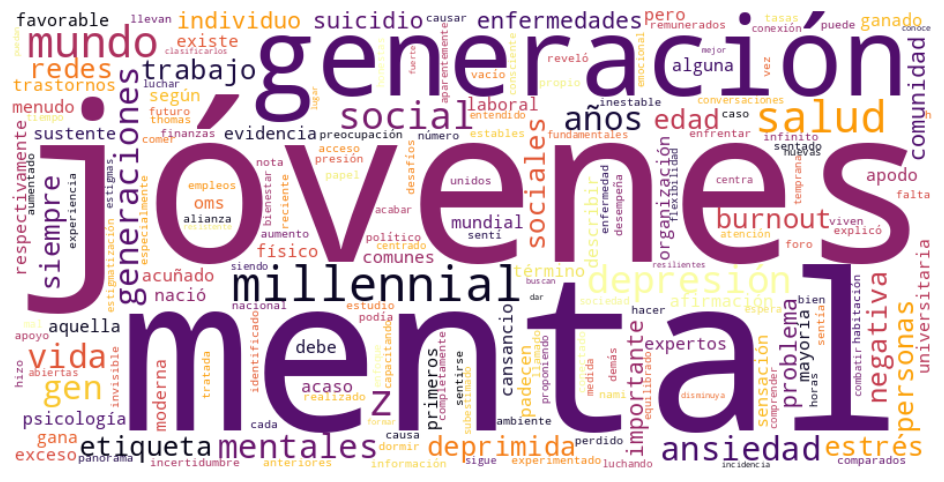

In [ ]:
# Configura la figura y el eje
plt.figure(figsize=(12,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')

# Muestra la nube de palabras
plt.show()


## Nube Noticias BBC

In [ ]:
Strbbc = " ".join(no_stopwords)
print(no_stopwords)

['hace', 'meses', 'paciente', 'dijo', 'pertenezco', 'generación', 'deprimida', 'cómo', 'voy', 'estarlo', 'primera', 'sesión', 'vino', 'terapia', 'encontraba', 'ganas', 'motivación', 'sensación', 'vida', 'cierto', 'pertenece', 'llamada', 'generación', 'deprimida', 'generación', 'engloba', 'realidad', 'conjunto', 'dos', 'millennial', 'llamada', 'generación', 'generación', 'z', 'primera', 'hace', 'referencia', 'personas', 'nacieron', '1981', '1995', 'segunda', 'llegaron', 'mundo', '1995', '2010', 'ambas', 'fechas', 'aproximadas', 'pues', 'consenso', 'claro', 'social', 'clasificación', 'cierto', 'cada', 'vez', 'antidepresivos', 'asistencia', 'terapia', 'psicológica', 'expresión', 'autoinformada', 'ansiedad', 'tristeza', 'vayamos', 'partes', 'descubrir', 'factores', 'influyen', 'factores', 'deprimido', 'generación', 'empecemos', 'definir', 'trastorno', 'depresión', 'manifiesta', 'conjunto', 'síntomas', 'cuales', 'podemos', 'destacar', 'ánimo', 'deprimido', 'día', 'disminución', 'interés', '

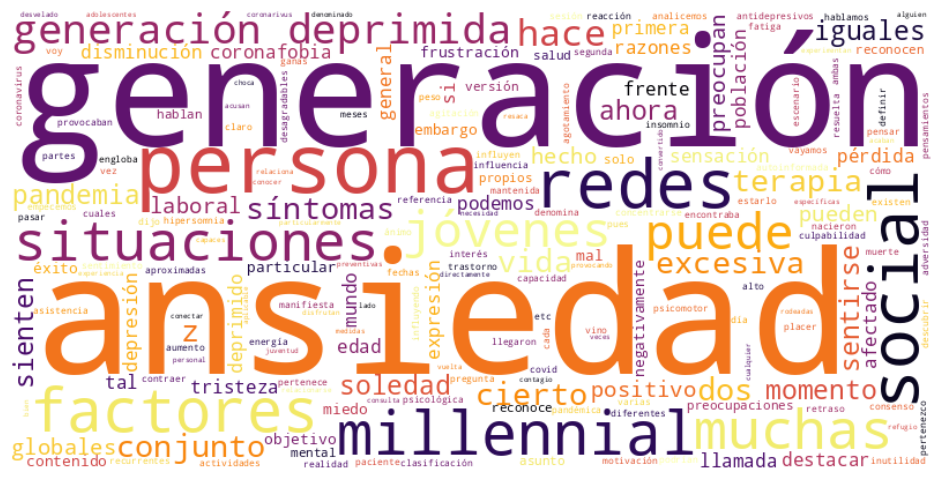

In [ ]:
cloud = wc.generate(Strbbc)
# Configura la figura y el eje
plt.figure(figsize=(12,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')

# Muestra la nube de palabras
plt.show()

# Conclusiones

- Los textos generados por ML, tienden a tener una menor calidad que aquellos generados por un experto en la materia, sin embargo, pueden ser equiparables si se solicitan de manera más específica.

- El texto generado por ChatGPT, tiende a ser menos negativoy enfoca el desarrollo del discurso en el sujeto antes del fenómeno, mientras que el desarrollo del discurso generado por la BBC, es entorno al fenómeno antes del sujeto, y esto puede ser relevante a la hora de descubrir textos generados por ML.

- Ambos textos desarrollan ideas similares, y comparten gran parte de las palabras, esto es debido a que ChatGPT, genera sus tokens de palabras a partir de textos realizados por humanos, lo cual, induce a la tendencia que compartan información.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7e14638c-4da2-4339-a6ab-bf433380ccaa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>